# **IST 652 – SCRIPTING FOR DATA ANALYSIS - FINAL PROJECT REPORT**
# **INSIGHTS FROM A LOCAL BOOK STORE SALES DATA**

* By **Kishan Rathor**

* Under the guidance of **Professor Angela Ramnarine Rieks**

# **Objective**

As an individual researcher delving into the realm of data analytics, this project represents a significant endeavor to apply analytical skills to a real-world business context. The aim is to dissect and understand the multifaceted nature of a local bookstore's operations in Syracuse through the lens of data. Key objectives include:

1. Uncovering Sales Trends and Patterns: Analyzing transaction data to identify key drivers of sales and customer purchasing behaviors.
2. Enhancing Inventory Management: Utilizing data insights to optimize stock levels and manage inventory more effectively.
3. Developing Strategic Business Recommendations: Drawing actionable insights from data to assist the bookstore in making informed decisions that could lead to improved profitability and customer engagement.

This project seeks to blend theoretical knowledge with practical application, providing a comprehensive analysis that is both insightful and directly applicable to the bookstore's unique context.


# **Background**

The analysis is grounded in the examination of two detailed datasets, each offering a different perspective on the bookstore's transactions and operations:

1. Old Data: This dataset comprises 801 entries, each representing a distinct transaction. Spanning 22 columns, it includes data on transaction dates, times, gross sales, discounts, service charges, net sales, payment methods, and more. This dataset gives a transaction-level view of the bookstore's sales, allowing for an analysis of sales trends, payment preferences, and customer spending behaviors.
2. New Data: Complementing the first, this dataset is more extensive, with 4,448 entries. It covers 10 different columns, focusing on the date and time of transactions, item details, quantities, SKU, gross sales, discounts, net sales, tax, and units. This dataset offers a deeper dive into the specifics of what items are being sold, in what quantities, and their sales performance.

Together, these datasets provide a rich, multi-dimensional view of the bookstore's sales and operations, encompassing a wide array of transactional details and customer interactions. The analysis aims to synthesize these datasets to draw a holistic picture of the bookstore's business dynamics, identifying patterns and opportunities for strategic improvements.


# **Scope**

The analysis encompasses two datasets, categorized into sales transactions and customer interactions. The 'New Data' set includes 4,448 entries with a focus on sales details such as item descriptions, quantities, and financials, while the 'Old Data' set comprises 801 entries detailing historical sales patterns, payment methods, and overall business performance before implementing new strategies.

**Old Data Set Information:**
* Date and Time: When transactions took place.
* Sales Data: Including Gross Sales, Discounts, Net Sales, and Tax.
* Payment Methods: Including Card, Cash, and Other Tender Types.
* Transaction Details: Such as Service Charges, Total Collected, Fees, and Net Total.
* Miscellaneous: Including Card Brand, Description, and various Fee-related columns.

**New Data Set Information:**
* Date and Time: When transactions took place.
* Item Details: Item name, Quantity, and SKU.
* Financials: Gross Sales, Discounts, Net Sales, and Tax.
* Unit: Unit of measurement for items sold.



# **Business Questions**

1. Promotional Strategy Tailoring: How can we tailor promotional strategies to encourage the use of payment methods that are less frequently used?
2. Staffing and Inventory Adjustments: How could staffing and inventory management be adjusted to accommodate the weekly sales cycle?
3. Analysis of Sales Peaks and Troughs: What are the potential causes of sales peaks and troughs throughout the period?
4. Alignment of Sales Trends with Marketing: How do monthly sales trends align with marketing efforts and inventory changes?
5. Holiday Marketing Strategy Improvements: How can holiday marketing strategies be improved based on sales on Holidays?
6. Pricing Strategy Optimization: How can we use the variability in quantity and total collected to optimize pricing strategies and inventory stocking?
7. Promotional Activities Scheduling: Can promotional activities or special events be scheduled during lower-activity times to increase sales?


from google.colab import drive
drive.mount('/content/drive')

# **Data Analysis**

**Data Acquisition**

For this project, I was furnished with two datasets by the bookstore owner, which encapsulate a comprehensive record of the store’s sales and customer interactions. The datasets were imported into the Python environment using the Pandas library, a powerful tool for data manipulation and analysis. The first dataset, referred to as 'Old Data', consists of 801 entries across 22 columns, while the second dataset, 'New Data', contains 4,448 entries spanning 10 columns.



**Loading the Data**

In [3]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

old_data = pd.read_csv('Old Data.csv')
new_data = pd.read_excel('New Data.xlsx')

**Examining the Data Structure and types**

In [5]:
# Old Data
print("Old Data Info:")
old_data.info()

Old Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 801 non-null    object 
 1   Time                 801 non-null    object 
 2   Gross Sales          801 non-null    object 
 3   Discounts            801 non-null    object 
 4   Service Charges      801 non-null    object 
 5   Net Sales            801 non-null    object 
 6   Gift Card Sales      801 non-null    object 
 7   Tax                  801 non-null    object 
 8   Total Collected      801 non-null    object 
 9   Card                 801 non-null    object 
 10  Cash                 801 non-null    object 
 11  Other Tender Type    2 non-null      object 
 12  Other Tender Note    2 non-null      float64
 13  Fees                 801 non-null    object 
 14  Net Total            801 non-null    object 
 15  Card Brand           459 

**View the First Few Rows**

In [6]:
# Old Data
print("Old Data - First Few Rows:")
old_data.head()

Old Data - First Few Rows:


,Date,Time,Gross Sales,Discounts,Service Charges,Net Sales,Gift Card Sales,Tax,Total Collected,Card,...,Other Tender Note,Fees,Net Total,Card Brand,Description,Initial Fees,Adjustment Fees,Fee Plan,Fee Percentage Rate,Fee Fixed Rate
0,2023-09-28,13:20:34,$10.00,$0.00,$0.00,$10.00,$0.00,$0.80,$10.80,$10.80,...,NaN,-$0.37,$10.43,Discover,447728,-$0.37,$0.00,Blended Rate,2.5,$0.10
1,2023-09-28,10:45:29,$47.50,$0.00,$0.00,$47.50,$0.00,$3.80,$51.30,$0.00,...,NaN,$0.00,$51.30,NaN,"Custom Amount, Custom Amount, Custom Amount, C...",$0.00,$0.00,NaN,NaN,NaN
2,2023-09-28,10:17:10,$6.00,$0.00,$0.00,$6.00,$0.00,$0.48,$6.48,$0.00,...,NaN,$0.00,$6.48,NaN,442446,$0.00,$0.00,NaN,NaN,NaN
3,2023-09-27,15:52:00,$183.53,$0.00,$0.00,$183.53,$0.00,$14.68,$198.21,$0.00,...,NaN,$0.00,$198.21,NaN,"444947, 417218, 463760, 459484, 448267, 411822...",$0.00,$0.00,NaN,NaN,NaN
4,2023-09-27,14:32:14,$16.00,$0.00,$0.00,$16.00,$0.00,$1.28,$17.28,$17.28,...,NaN,-$0.53,$16.75,American Express,"463530, 292665, 413966",-$0.53,$0.00,Blended Rate,2.5,$0.10


**Old Data Structure:**
* Entries: 801
* Columns: 22
* Non-Null Count: The dataset is largely complete with few missing values.
* Data Types: Primarily object (string) types, with one float column.
* Columns of Note: The data includes transaction details such as 'Date', 'Time', 'Gross Sales', various fees, and payment methods ('Card', 'Cash', etc.).


**Data Cleaning next steps for  - Old Data:**

We're just gonna use this data set for analysis of Mode of Payment

In [7]:
# New Data
print("\nNew Data Info:")
new_data.info()


New Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448 entries, 0 to 4447
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4447 non-null   datetime64[ns]
 1   Time         4447 non-null   object        
 2   Item         4447 non-null   object        
 3   Qty          4448 non-null   int64         
 4   SKU          2459 non-null   object        
 5   Gross Sales  4448 non-null   float64       
 6   Discounts    4448 non-null   float64       
 7   Net Sales    4448 non-null   float64       
 8   Tax          4448 non-null   float64       
 9   Unit         4447 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 347.6+ KB


In [8]:
# New Data
print("\nNew Data - First Few Rows:")
new_data.head()


New Data - First Few Rows:


,Date,Time,Item,Qty,SKU,Gross Sales,Discounts,Net Sales,Tax,Unit
0,2023-11-16,14:44:31,Custom Amount,1,NaN,3.0,0.0,3.0,0.24,ea
1,2023-11-16,14:44:31,Custom Amount,1,NaN,3.0,0.0,3.0,0.24,ea
2,2023-11-16,14:44:31,364131,1,"Turkeys, Pilgrims, and Indian Corn:",4.0,0.0,4.0,0.32,ea
3,2023-11-16,14:44:31,458418,1,Child Life in Colonial Days,20.0,0.0,20.0,1.60,ea
4,2023-11-16,14:44:31,Custom Amount,3,NaN,9.0,0.0,9.0,0.72,ea


**New Data Structure:**
* Entries: 4,448
* Columns: 10
* Non-Null Count: A higher count of missing values in 'SKU' column.
* Data Types: A mix of datetime, float, integer, and object types.
* Columns of Note: This dataset includes 'Item', 'Qty', 'Gross Sales', 'Net Sales', and 'Tax'.

**Data cleaning next steps for - New Data**
- Datetime conversion of the Time Colmn
- Monetary values are already in numeric format, so conversion not required
- Drop 'Gross Sales' and 'Service Charges' columns.
- Calculate 'Total Sales' as the sum of 'Net Sales' and 'Tax'.
- Drop unnecessary columns like 'Initial Fees', 'Adjustment Fees', etc.

# Initial Assessment

**Checking for Missing Values**

**Old Data Missing Values:**
* 'Other Tender Type' and 'Other Tender Note' had a significant number of missing values (799 out of 801).
* 'Card Brand', 'Fee Plan', 'Fee Percentage Rate', and 'Fee Fixed Rate' had 342 missing values.

**New Data Missing Values:**
* 'SKU' had 1,989 missing values, indicating incomplete tracking of stock keeping units.
* Singular missing values in 'Date', 'Time', 'Item', and 'Unit'.

Given the missing values in the 'SKU' column, which includes important information such as the names of books sold, it was decided not to use this column for the current stage of analysis, although it was not deleted in case it could be useful for future analysis. 
Additionally, a row nmber 4447 had multiple missing values, hence it was removed to maintain data integrity.


In [9]:
# Old Data
print("Old Data Missing Values:")
old_data.isnull().sum()

Old Data Missing Values:


Date                     0
Time                     0
Gross Sales              0
Discounts                0
Service Charges          0
Net Sales                0
Gift Card Sales          0
Tax                      0
Total Collected          0
Card                     0
Cash                     0
Other Tender Type      799
Other Tender Note      799
Fees                     0
Net Total                0
Card Brand             342
Description              0
Initial Fees             0
Adjustment Fees          0
Fee Plan               342
Fee Percentage Rate    342
Fee Fixed Rate         342
dtype: int64

* Upon checking for missing values, there were not any missing values in the concerned column in old data, which is Card Brand

In [10]:
# New Data
print("\nNew Data Missing Values:")
print(new_data.isnull().sum())


New Data Missing Values:
Date              1
Time              1
Item              1
Qty               0
SKU            1989
Gross Sales       0
Discounts         0
Net Sales         0
Tax               0
Unit              1
dtype: int64


**Unique Values Exploration, Card Brand Column from Old Data**

Unique values were also explored, particularly in the 'Card Brand' column from the Old Data, which revealed that payments were made using Discover, American Express, MasterCard, and Visa. NaN values in this column were confirmed by the bookstore owner to indicate cash payments.

In [11]:
# For a specific column in Old Data
print("Unique Values in a Column of Old Data:")
old_data['Card Brand'].unique()

Unique Values in a Column of Old Data:


array(['Discover', nan, 'American Express', 'MasterCard', 'Visa',
       'Visa, Visa'], dtype=object)

In [12]:
# Normalize the 'Card Brand' column
old_data['Card Brand'] = old_data['Card Brand'].str.strip()  # Remove leading/trailing spaces
old_data['Card Brand'] = old_data['Card Brand'].replace(['Visa, Visa'], 'Visa')  # Replace inconsistent entries

# Check unique values again
print("Normalized Unique Values in 'Card Brand' Column:")
print(old_data['Card Brand'].unique())

Normalized Unique Values in 'Card Brand' Column:
['Discover' nan 'American Express' 'MasterCard' 'Visa']


**Card brands used to make payments were,**
* Discover
* Amex
* MasterCard
* Visa
* NaN means payment was made using Cash (Confirmed from owner)

In [13]:
# Flag cash payments
# If 'Card Brand' is missing, it's a cash payment
old_data['Payment Method'] = old_data['Card Brand'].apply(lambda x: 'Cash' if pd.isna(x) else 'Card')

# Alternatively, if you want to keep 'Card Brand' as is and create a separate flag for cash
old_data['Is Cash Payment'] = old_data['Card Brand'].isna()

# Handling missing values in 'Card Brand'
old_data['Card Brand'] = old_data['Card Brand'].fillna('Cash')

**Checking for Duplicate Values**

In assessing data quality, I checked for duplicate values and found none, which suggests that transactions were sufficiently unique, even when similar transactions occurred close in time. This is important as it reflects genuine customer behavior and sales patterns.

In [14]:
# Old Data
print("Old Data Duplicates:")
old_data.duplicated().sum()

Old Data Duplicates:


0

In [15]:
# New Data
print("\nNew Data Duplicates:")
new_data.duplicated().sum()


New Data Duplicates:


363

* Transactions are likely to be repeated within short intervals (e.g., multiple customers buying the same priced item within the same minute).
* The analysis focuses on broader trends over time rather than individual transaction uniqueness.
* Removing duplicates could potentially distort the actual sales performance or customer behavior patterns you're trying to analyze.

Strong Positive Relationship:
Between Sales and Taxes: As sales figures (both gross and net) increase, the amount of tax collected also increases.
Sales and Quantity: Higher quantities sold lead to higher sales amounts.
Negative Impact of Discounts:
Reduction in Sales: An increase in discounts leads to a decrease in net sales, indicating that heavier discounts may reduce overall revenue.

# **Data Cleaning**

* Furthermore, the 'Gross Sales' column was dropped since its values were identical to those in the 'Net Sales' column
* Dropped the 'Unit' column was removed as it only contained the value "EA" (each). 

In [16]:
# Drop the 'Gross Sales' column
new_data.drop('Gross Sales', axis=1, inplace=True)

In [17]:
# Drop the 'Unit' column
new_data.drop('Unit', axis=1, inplace=True)

**Converting Date & Time Column to Datetime Data Type** 

The 'Time' and 'Date' columns were converted to datetime format for more accurate temporal analysis. 

In [18]:
new_data['Date'] = pd.to_datetime(new_data['Date'])

In [19]:
# Convert 'Time' column to datetime.time
new_data['Time'] = pd.to_datetime(new_data['Time'], format='%H:%M:%S')

In [20]:
# New Data
print("\nNew Data - First Few Rows:")
new_data.head()


New Data - First Few Rows:


,Date,Time,Item,Qty,SKU,Discounts,Net Sales,Tax
0,2023-11-16,1900-01-01 14:44:31,Custom Amount,1,NaN,0.0,3.0,0.24
1,2023-11-16,1900-01-01 14:44:31,Custom Amount,1,NaN,0.0,3.0,0.24
2,2023-11-16,1900-01-01 14:44:31,364131,1,"Turkeys, Pilgrims, and Indian Corn:",0.0,4.0,0.32
3,2023-11-16,1900-01-01 14:44:31,458418,1,Child Life in Colonial Days,0.0,20.0,1.60
4,2023-11-16,1900-01-01 14:44:31,Custom Amount,3,NaN,0.0,9.0,0.72


**Dropping Column number 4447**

One particular row in the New Data was dropped due to it lacking any values.

In [21]:
new_data = new_data.drop(index=4447)

In [22]:
#Drop the 'Discounts' column
new_data.drop('Discounts', axis=1, inplace=True)

Dropping Row number 4447 cause it had no values

**Adding a new column**

A new column, 'Total Collected', was computed by adding 'Net Sales' and 'Tax' together.

In [23]:
new_data['Total Collected'] = new_data['Net Sales'] + new_data['Tax']

In [ ]:
#old_data['Date'] = pd.to_datetime(old_data['Date'])
#old_data['Time'] = pd.to_datetime(old_data['Time'], format= '%H:%M:%S'.dt.time) # Adjust format as per your data

**More Modifications regarding time**

* Upon converting the 'Time' column from string to datetime, a default date of 1900-01-01 was added, which was unnecessary and subsequently removed. 
* A new column named 'Day' was added corresponding to the dates to facilitate analysis based on the day of the week.

In [24]:
# Convert 'Time' to just the time part if it has an unnecessary date part
new_data['Time'] = pd.to_datetime(new_data['Time']).dt.time

# Add a new column 'Day' for the day of the week next to the 'Date' column
new_data.insert(loc=new_data.columns.get_loc('Date') + 1, column='Day', value=new_data['Date'].dt.day_name())

In [25]:
# Display the first few rows to verify
new_data.head(5)

,Date,Day,Time,Item,Qty,SKU,Net Sales,Tax,Total Collected
0,2023-11-16,Thursday,14:44:31,Custom Amount,1,NaN,3.0,0.24,3.24
1,2023-11-16,Thursday,14:44:31,Custom Amount,1,NaN,3.0,0.24,3.24
2,2023-11-16,Thursday,14:44:31,364131,1,"Turkeys, Pilgrims, and Indian Corn:",4.0,0.32,4.32
3,2023-11-16,Thursday,14:44:31,458418,1,Child Life in Colonial Days,20.0,1.60,21.60
4,2023-11-16,Thursday,14:44:31,Custom Amount,3,NaN,9.0,0.72,9.72


In [27]:
import pandas as pd

# Combine 'Date' and 'Time' into a single datetime column
new_data['Datetime'] = pd.to_datetime(new_data['Date'].astype(str) + ' ' + new_data['Time'].astype(str))

In [28]:
# New Data
print("\nNew Data Statistical Summary:")
new_data.describe()


New Data Statistical Summary:


,Date,Qty,Net Sales,Tax,Total Collected,Datetime
count,4447,4447.000000,4447.000000,4447.000000,4447.000000,4447
mean,2023-09-29 22:28:41.070384384,1.010794,7.106724,0.521687,7.628410,2023-09-30 12:34:35.815156224
min,2023-08-15 00:00:00,-2.000000,-10.000000,-0.400000,-10.000000,2023-08-15 09:39:40
25%,2023-09-08 00:00:00,1.000000,4.000000,0.320000,4.320000,2023-09-08 09:43:02.500000
50%,2023-09-29 00:00:00,1.000000,5.000000,0.400000,5.400000,2023-09-29 15:49:36
75%,2023-10-23 00:00:00,1.000000,7.500000,0.560000,8.100000,2023-10-23 13:58:37
max,2023-11-16 00:00:00,8.000000,225.000000,18.000000,243.000000,2023-11-16 14:44:31
std,NaN,0.202037,8.790021,0.618001,9.304999,NaN


In [29]:
# Columns to check for negative values
columns_to_check = ['Qty', 'Net Sales', 'Tax', 'Total Collected']

# Remove rows where any of the specified columns have negative values
for column in columns_to_check:
    new_data = new_data[new_data[column] >= 0]

# Verify the removal
print(new_data.describe())

                                Date          Qty    Net Sales          Tax  \
count                           4441  4441.000000  4441.000000  4441.000000   
mean   2023-09-29 23:09:05.552803328     1.013736     7.122349     0.522639   
min              2023-08-15 00:00:00     1.000000     0.000000     0.000000   
25%              2023-09-08 00:00:00     1.000000     4.000000     0.320000   
50%              2023-09-29 00:00:00     1.000000     5.000000     0.400000   
75%              2023-10-23 00:00:00     1.000000     7.500000     0.560000   
max              2023-11-16 00:00:00     8.000000   225.000000    18.000000   
std                              NaN     0.185124     8.785058     0.617844   

       Total Collected                       Datetime  
count      4441.000000                           4441  
mean          7.644988  2023-09-30 13:14:54.692186368  
min           0.000000            2023-08-15 09:39:40  
25%           4.320000            2023-09-08 10:22:45  
50%     

# **Visualisations**

# Preferred mode of payment

* I delved into the payment methods data. By visualizing the modes of payment used for transactions, I observed varying usage across different payment methods.

* Two visual representations were created: a bar chart and a pie chart. The bar chart displays the number of transactions for each payment method, while the pie chart provides a percentage distribution of the transactions.


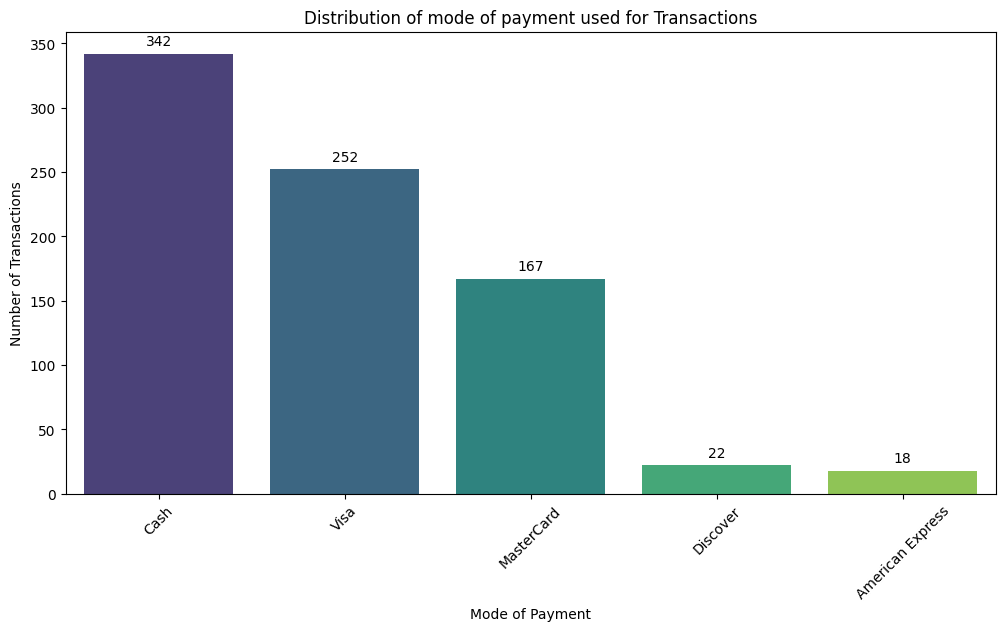

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'old_data' is your DataFrame and it has a 'Card Brand' column

# Replace missing values with 'Unknown' or another placeholder if you haven't already
old_data['Card Brand'] = old_data['Card Brand'].fillna('Unknown')

# Count the occurrences of each card brand
card_brand_counts = old_data['Card Brand'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=card_brand_counts.index, y=card_brand_counts.values, palette="viridis")
plt.title('Distribution of mode of payment used for Transactions')
plt.xlabel('Mode of Payment')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Adding annotations
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center',
                     va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.show()

**Bar Chart Observations:**
* Cash is the most utilized payment method, with 342 transactions.
* Visa follows with 252 transactions.
* MasterCard and Discover have a moderate usage with 167 and 22 transactions respectively.
* American Express is the least used, with only 18 transactions recorded.

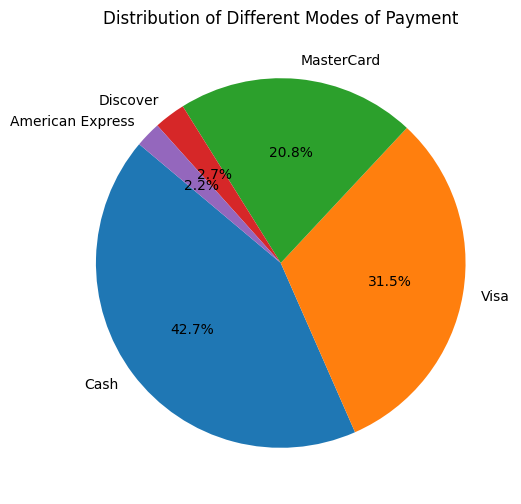

In [31]:
# Aggregate data by 'Card Brand'
payment_distribution = old_data['Card Brand'].value_counts()

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Different Modes of Payment')
plt.show()

**Pie Chart Observations:**

* Cash payments constitute 42.7% of all transactions.
* Visa transactions account for 31.5%.
* MasterCard is used in 20.8% of transactions.
* Discover and American Express have minimal use at 2.7% and 2.2% respectively.

From the transaction data analysis, it’s evident that cash and Visa are the preferred payment methods, with significant leads over other types. This preference provides an opportunity to introduce targeted marketing strategies such as cash-back offers or loyalty programs, particularly for Visa users. Such initiatives could potentially enhance customer retention and boost sales by leveraging existing consumer behavior trends.


# Sales per day of the week

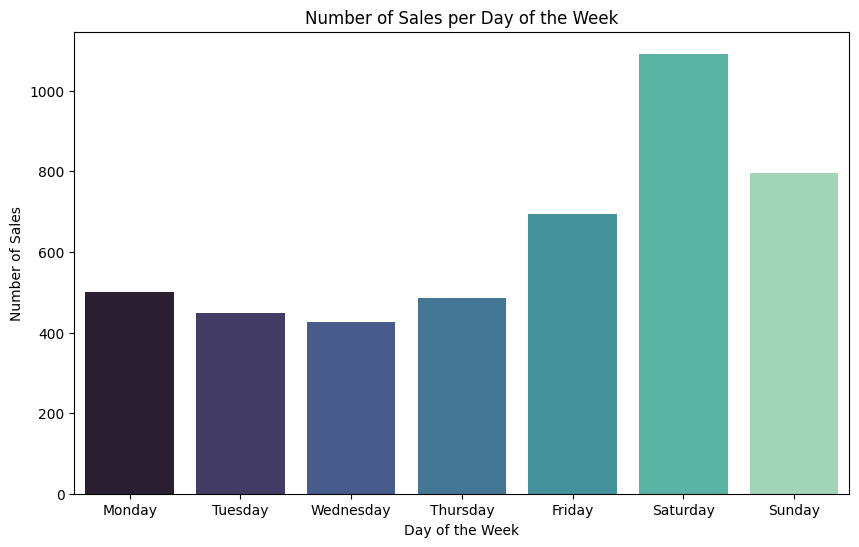

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'new_data' is your DataFrame and it has 'Day of Week' column

# Count the number of sales (transactions) for each day of the week
sales_per_day = new_data['Day'].value_counts()

# Sorting the days in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_per_day = sales_per_day.reindex(days_order)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_per_day.index, y=sales_per_day.values, palette="mako")
plt.title('Number of Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.show()

In the pursuit of understanding the bookstore's business flow throughout the week, I analyzed the number of sales per day. This analysis aimed to discern patterns that could inform strategic decision-making in terms of promotions and staffing.

The data was visualized in a bar chart representing the number of sales for each day of the week. 

**The following observations were made:**
* Sales exhibit variability across the week, with certain days attracting more customers than others.
* Saturday stands out as the busiest day, with sales nearly reaching the 1000 transactions mark.
* In contrast, Monday is the quietest, with the lowest number of sales.

Based on these insights, strategic initiatives can be implemented to maximize profitability and improve customer engagement:
* Weekend Promotions: Considering the surge in traffic on Saturdays, weekend-specific promotions or events could be introduced to further increase sales. These could include limited-time offers or special discounts that encourage more transactions.
* Monday Marketing: To counteract the lull in sales on Mondays, special deals or marketing campaigns could be launched to attract more customers. These could take the form of 'Monday Deals', early-week discounts, or loyalty program incentives that encourage repeat business.

By tailoring marketing and promotional efforts to the observed sales patterns, the bookstore can better align its strategies with customer behavior, thereby increasing the potential for higher sales volume and overall store performance.


# Time Series Analysis

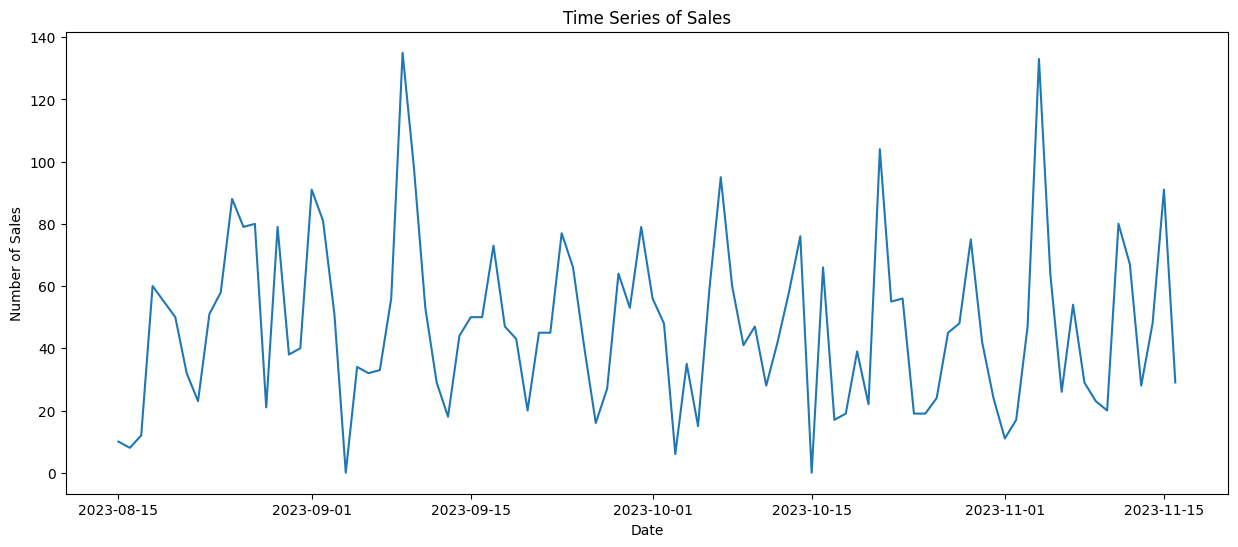

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the 'Datetime' column as the index
new_data.set_index('Datetime', inplace=True)

# Resample data to get daily counts (or sums if you're using a sales amount)
# 'D' for daily. Use 'W' for weekly, 'M' for monthly, etc., as needed
daily_sales = new_data.resample('D').size()  # Use .sum() if aggregating sales amounts

# Plotting the time series
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_sales)
plt.title('Time Series of Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()

In the course of examining the bookstore's sales data, a time series analysis was conducted to discern daily sales patterns and trends over time. This analysis is instrumental in understanding the dynamics of sales and can significantly influence strategic planning.

The time series plot, which outlines the number of sales across several months, reveals notable fluctuations in daily sales, indicating variability inherent in consumer purchasing behavior.

**Key Observations from the Time Series Graph:**
* Sales do not remain constant; they vary significantly from day to day.
* The graph exhibits consistent patterns of peaks and troughs, suggesting regular cycles in consumer behavior.
* A significant observation is that sales tend to spike around mid-week. These spikes suggest increased activity that could be attributed to various factors such as weekly routines, marketing efforts, or external events.

**Strategic Implications:**
* The mid-week sales spikes present an opportunity to schedule impactful marketing initiatives. By aligning marketing campaigns with these natural sales peaks, the bookstore can leverage existing customer traffic to maximize reach and conversion rates.
* Promotions, events, or special deals could be timed to coincide with the anticipated peaks to further amplify sales numbers.
* Understanding the sales troughs is equally important. Investigating the causes of these dips and addressing them through targeted strategies could help in smoothing out sales over time, ensuring steadier revenue streams.

This time series analysis underlines the importance of adaptive business strategies that respond to observable sales patterns. By aligning promotional activities with the natural ebb and flow of consumer purchasing, the bookstore can more effectively drive sales and enhance its overall business performance.


# Monthly Sales Analysis

Analysis of Sales Distribution and Cumulative Sales Over Time
To gain insights into the bookstore's performance and identify potential seasonal trends, a detailed analysis of the monthly sales data was conducted. The investigation involved both a point-in-time assessment of monthly sales distribution and a longitudinal view via cumulative sales over time.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'new_data' is your DataFrame and it has a 'Date' column

# Extract the month from the 'Date' column
new_data['Month'] = new_data['Date'].dt.month_name()

# Aggregate sales by month (counting the number of sales transactions per month)
monthly_sales = new_data.groupby('Month').size()

# Sorting the months in order (optional, based on your data range and preference)
months_order = ['August', 'September', 'October', 'November']
monthly_sales = monthly_sales.reindex(months_order)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm")
plt.title('Sales Made Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

**Monthly Sales Distribution Observations:**
* The monthly sales data, represented in a bar chart, highlighted significant variations in the number of sales across different months.
* September stood out as the month with the highest sales volume, exceeding 1500 transactions.
* However, there was a notable downward trend as the year progressed into November. It's important to note that data for November was only available for half the month, which may affect the interpretation of this trend.


In [ ]:
# Calculate cumulative sales
new_data['Cumulative Sales'] = new_data['Total Collected'].cumsum()

# Plotting cumulative sales
plt.figure(figsize=(12, 6))
plt.plot(new_data['Date'], new_data['Cumulative Sales'])
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.show()

**Cumulative Sales Over Time Observations:**

* A cumulative sales plot over the same period depicted a declining trend in total sales.
* This trend line is critical for understanding the overall sales trajectory and for assessing the long-term sustainability of current business strategies.

**Strategic Planning Implications:**
* The peak in September, followed by a decline, suggests that certain factors or events may have driven a temporary increase in sales, which were not sustained.
* The observed sales dip post-September necessitates strategic planning to counteract this trend. This could involve analyzing specific factors that contributed to the September peak and devising methods to replicate such success.
* Considering the festive season and end-of-year holidays, there is an opportunity to implement targeted marketing and sales promotions. These initiatives could aim to recapture the high sales activity seen in September and to mitigate the decline in the following months.

**Recommendations:**
* Develop and deploy targeted marketing campaigns designed to harness the sales momentum of September.
* Plan and execute holiday sales promotions to capitalize on seasonal shopping behaviors, with a focus on maximizing sales during what is traditionally a high-revenue period for retail businesses.


# Holiday Sales Analysis**

The influence of holidays on consumer behavior is a well-documented phenomenon, and this holds true for the bookstore in question as well. To quantify this effect, a comparative analysis was conducted between sales on holidays and average sales on other days.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is new_data and has a 'Date' and 'Total Collected' column

# Define the holiday dates for 2023
holidays = {
    'Labor Day': '2023-09-04',
    'Columbus Day': '2023-10-09',
    'Veterans Day': '2023-11-10',
    'Thanksgiving Day': '2023-11-23'
}

# Extract sales for holiday dates
holiday_sales = {holiday: new_data.loc[new_data['Date'] == pd.to_datetime(date), 'Total Collected'].sum()
                 for holiday, date in holidays.items()}

# Calculate average sales on non-holiday days
avg_sales_non_holiday = new_data.loc[~new_data['Date'].isin(pd.to_datetime(list(holidays.values()))), 'Total Collected'].mean()

# Create a plot
plt.figure(figsize=(10, 6))
holiday_names = list(holiday_sales.keys()) + ['Average Non-Holiday']
sales_values = list(holiday_sales.values()) + [avg_sales_non_holiday]

plt.bar(holiday_names, sales_values, color='teal')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Comparison of Sales on Holidays vs. Average Sales on Other Days')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'new_data' is your DataFrame and it has 'Date' and 'Total Collected' columns

# Define Columbus Day and Veterans Day for 2023
columbus_day = '2023-10-09'
veterans_day = '2023-11-10'

# Calculate total sales on Columbus Day and Veterans Day
total_columbus_day = new_data.loc[new_data['Date'] == columbus_day, 'Total Collected'].sum()
total_veterans_day = new_data.loc[new_data['Date'] == veterans_day, 'Total Collected'].sum()

# Calculate average sales on all Mondays and Thursdays
new_data['Day of Week'] = new_data['Date'].dt.day_name()
avg_monday_sales = new_data.loc[new_data['Day of Week'] == 'Monday', 'Total Collected'].mean()
avg_thursday_sales = new_data.loc[new_data['Day of Week'] == 'Thursday', 'Total Collected'].mean()

# Data for plotting
days = ['Columbus Day', 'Average Monday', 'Veterans Day', 'Average Thursday']
sales = [total_columbus_day, avg_monday_sales, total_veterans_day, avg_thursday_sales]

# Create double bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=days, y=sales, palette='Set2')
plt.title('Total Sales Comparison: Holidays vs Average Weekdays')
plt.ylabel('Total Sales')

# Annotate each bar with its value
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define holidays and their dates
holidays = {
    'Labor Day': '2023-09-04',
    'Columbus Day': '2023-10-09',
    'Veterans Day': '2023-11-10',
    'Thanksgiving Day': '2023-11-23'
}

# Calculate sales on holidays
holiday_sales = {holiday: new_data[new_data['Date'] == pd.to_datetime(date)]['Total Collected'].sum() for holiday, date in holidays.items()}

# Calculate average sales for each day of the week
new_data['Day of Week'] = new_data['Date'].dt.day_name()
avg_weekday_sales = new_data.groupby('Day of Week')['Total Collected'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Data for plotting
days = list(holiday_sales.keys()) + list(avg_weekday_sales.index)
sales = list(holiday_sales.values()) + list(avg_weekday_sales.values)

# Plotting with annotations
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x=days, y=sales, palette='viridis')
plt.title('Comparison of Holiday Sales vs. Average Weekday Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Annotate each bar with its value
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')

plt.show()

**Key Observations:**

* Sales data plotted for holidays versus average non-holiday weekdays shows a marked difference in customer activity.
* Columbus Day exhibited a significant surge in sales, with totals almost 40 times the average of a typical Monday's sales figures.
* Similarly, Veterans Day sales dramatically outpaced the sales of an average Thursday.
* There was no data available for Thanksgiving Day, and it was marked as zero in the dataset, possibly indicating the store was closed on that day.

**Strategic Considerations:**
* The stark contrast in sales on Columbus Day and Veterans Day as compared to average weekdays indicates that holidays are indeed significant drivers of traffic and sales.
* This pattern suggests the potential for tailoring marketing strategies to these specific high-traffic occasions, utilizing them as opportunities to launch special promotions or events that could attract even more customers.

**Recommendations for Future Planning:**
* Develop holiday-specific marketing campaigns that capitalize on the increased foot traffic during these days. Tactics could include limited-time offers, themed promotions, or special loyalty rewards that resonate with the celebratory nature of the holiday.
* Inventory planning should also be adjusted to accommodate the expected increase in sales, ensuring popular items are well-stocked to meet customer demand.
* Consider extending store hours or enhancing staffing on these peak days to provide the best customer experience and maximize sales opportunities.


# Variability in Transaction Metrics

**Analysis of Transaction Sizes and Values:** An essential aspect of retail analytics is understanding the variability in transaction sizes and values to tailor the business approach to customer spending behaviors. In this analysis, we have created box plots to visualize the distribution and range of 'Quantity' and 'Total Collected' per transaction at the bookstore.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'new_data' is your DataFrame and it contains 'Qty' and 'Total Collected' columns

# Box plot for 'Quantity'
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data, x='Qty')
plt.title('Box Plot of Quantity')
plt.show()

# Box plot for 'Total Collected'
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data, x='Total Collected')
plt.title('Box Plot of Total Collected')
plt.show()

**Box Plot Observations for Quantity:**
* The majority of transactions involve purchasing 1-2 items.
* There are outliers where up to 8 items are sold in a single transaction.

**Box Plot Observations for Total Collected:**
* Most transactions fall under the $50 mark.
* There are notable outliers with transactions collecting up to $250.

**Strategic Insights:**
* The data suggests a concentrated cluster of typical transaction sizes and values, with occasional larger purchases.
* This pattern presents an opportunity to explore product bundling, which can incentivize customers to increase the number of items per transaction, potentially moving the median transaction size upward.
* Implementing tiered pricing strategies could cater to the varying spending capacities of customers. By creating pricing tiers, the bookstore can encourage customers to spend more by offering incremental value at each tier.

**Recommendations:**
* Develop bundle deals that combine high-selling items with complementary products to increase the average transaction size.
* Consider implementing a rewards system where customers accumulate points or receive discounts as their purchase volume increases.
* Analyze the outliers to understand the circumstances leading to higher-value transactions and replicate these conditions where possible.


# Sales During Different Time Of The Day

**Identifying Peak Sales Times to Optimize Operations:** A critical aspect of retail management is understanding customer traffic patterns throughout the day to optimize staffing, inventory, and marketing efforts. The heatmap provided gives a clear visual representation of sales at different times throughout the day.


In [ ]:
# Ensure 'Hour' extraction is correct
new_data['Hour'] = new_data['Time'].apply(lambda t: t.hour)

# Aggregate sales by hour
hourly_sales = new_data.groupby('Hour')['Total Collected'].sum().reset_index()

# Check if hourly_sales has data
print(hourly_sales.head())

# Create a pivot table for the heatmap
pivot_table = hourly_sales.pivot_table(index='Hour', values='Total Collected', aggfunc='sum')

# Check if pivot_table has data
print(pivot_table.head())

# Plotting the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="viridis", linewidths=.5)
plt.title('Heatmap of Sales During Different Times of the Day')
plt.ylabel('Hour of Day')
plt.xlabel('Total Sales')
plt.show()

**Key Insights from the Heatmap:**
* The midday period from 12 PM to 3 PM shows the highest sales activity, indicating this is the peak time for customer purchases.
* The early hours of the morning and later in the evening display significantly lower sales volumes.

**Operational Recommendations:**
* Staffing: Align staff schedules to ensure adequate coverage during peak times to handle the increased customer traffic and to enhance the customer service experience.
* Inventory Management: Prepare for higher inventory turnover during these peak hours by ensuring that popular items are well-stocked and easily accessible.
* Marketing Initiatives: Implement targeted marketing strategies such as lunchtime specials or midday flash sales to capitalize on the already high traffic and boost sales even further.

**Strategic Marketing During Off-Peak Hours:**
* To address the lower sales volumes during the early morning and late evening, consider introducing special promotions during these hours. Early bird discounts or late-night deals could attract more customers during these typically slower periods.
* Explore the potential for events or workshops during off-peak hours, which could draw in customers and create additional sales opportunities outside the busiest hours.



# **Conclusion**

**Synthesizing Insights from Transaction Data Analysis at Books End**

This project entailed a comprehensive analysis of transaction data from Books End to gain a deeper understanding of customer purchasing behavior and sales trends. The insights drawn from the data have illuminated several key aspects of the bookstore's operations and customer engagement.

**Key Findings:**
* Payment Methods: Cash and Visa emerged as the predominant payment methods used by customers. This finding points to the potential for developing strategic partnerships and crafting rewards programs that encourage repeat business and increase customer loyalty.
* Sales Trends: Analysis revealed that Saturday is the peak day for sales, presenting a valuable opportunity to implement weekend-specific promotions aimed at boosting revenue.
* Seasonal Variations: A notable slowdown in sales momentum was observed during October and November. This trend underscores the need for timely marketing interventions to revitalize sales during these months.

**Strategic Recommendations:**
* Develop strategic partnerships with payment providers and introduce rewards programs that align with the payment preferences of cash and Visa users.
* Launch weekend-specific marketing promotions, leveraging the high traffic on Saturdays to increase sales and enhance the shopping experience.
* Implement targeted marketing campaigns during the identified slow months of October and November. These could include special discounts, events, or loyalty perks to re-engage customers and stimulate purchasing activity.
* Introduce special incentives on slower business days to distribute the customer traffic more evenly throughout the week and optimize sales potential.

**Moving Forward:**
* To maintain a competitive edge in the market, it is recommended that Books End engage in continuous data monitoring. This will enable the bookstore to remain agile, adapting its strategies in response to evolving sales patterns and market trends.

By embracing data-driven decision-making and continuously refining its approach based on the insights gained, Books End can better cater to the needs of its customers and secure its market position.


# **Future Scope**

* Predictive Analytics: Utilizing machine learning to forecast future sales trends and customer behavior.
* Customer Segmentation: Targeted marketing based on genres sold
* Inventory Optimization: Applying data analytics to optimize stock levels, reduce overstock, and avoid stockouts based on genres sold
* Chat bot: Building a Chat bot using prompt engineering for specific queries of customers
* Integration with Other Data Sources: Combining sales data with external data sources like market trends, demographic information, or economic indicators to gain a more comprehensive business insight.


# **References**

**Data Sources:**
* Books End Bookshop (2023). Transaction Data 2023.

**Software and Libraries:**
* Python Software Foundation. (2023). Python Language Reference, version 3.9. Retrieved from https://www.python.org
* McKinney, W. (2023). pandas: Powerful Python data analysis toolkit, version 1.3.1. Retrieved from https://pandas.pydata.org

**Literature:**
* Severance, C. Python for Everybody: Exploring Data in Python 3 (ISBN : 978- 1530051120). https://www.py4e.com/book
Open version https://books.trinket.io/pfe/index.html

* McKinney, W. Python for Data Analysis, 3rd Edition (ISBN- 9781098104030). https://www.oreilly.com/library/view/python-for-data/9781098104023/
Open version https://wesmckinney.com/book/

* Data Wrangling with Python: Tips and Tools to Make Your Life Easier (ISBN-13: 978-1491948811) 
See https://www.oreilly.com/library/view/data-wrangling- with/9781491948804/

